In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_ret(df):
    log_ret = df['Adj Close'].apply(np.log).diff().fillna(0).to_frame()
    sim_ret = df['Adj Close'].pct_change().fillna(0).to_frame()
    log_ret.columns = ['Log Ret']
    sim_ret.columns = ['Simple Ret']
    return pd.concat([df, log_ret, sim_ret], axis=1)

df_aapl = pd.read_csv(r'AAPL.csv', index_col='Date').iloc[0:-4]
df_aapl.index = pd.to_datetime(df_aapl.index, format='%Y-%m-%d')

df_ibm = pd.read_csv(r'IBM.csv', index_col='Date').iloc[0:-4]
df_ibm.index = pd.to_datetime(df_ibm.index, format='%Y-%m-%d')

df_jpm = pd.read_csv(r'JPM.csv', index_col='Date').iloc[0:-4]
df_jpm.index = pd.to_datetime(df_jpm.index, format='%Y-%m-%d')

df_dji = pd.read_csv(r'DJI.csv', index_col='Date').iloc[0:-4]
df_dji.index = pd.to_datetime(df_dji.index, format='%Y-%m-%d')

df_aapl = compute_ret(df_aapl)
df_ibm = compute_ret(df_ibm)
df_jpm = compute_ret(df_jpm)
df_dji = compute_ret(df_dji)

def add_outlier(df, outlier_percentage):
    date_list = df['Adj Close'].sample(frac=outlier_percentage).index
    temp_df = df[df.columns[0:-2]].copy()
    outlier = 1.2 * df['Adj Close'].max()
    for d in date_list:
        temp_df['Adj Close'].loc[d] = outlier
    return temp_df

outlier_aapl = compute_ret(add_outlier(df_aapl, 0.1))
outlier_ibm = compute_ret(add_outlier(df_ibm, 0.1))
outlier_jpm = compute_ret(add_outlier(df_jpm, 0.1))

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [3]:
#question1

def moving_average(df):
    temp_df = df.copy()
    ma20 = temp_df[['Adj Close']].rolling(20).mean()
    ma20.columns = ['20-day MA']
    ma50 = temp_df[['Adj Close']].rolling(50).mean()
    ma50.columns = ['50-day MA']
    return pd.concat([df, ma20, ma50], axis=1)

df_aapl = moving_average(df_aapl)
df_ibm = moving_average(df_ibm)
df_jpm = moving_average(df_jpm)

outlier_aapl = moving_average(outlier_aapl)
outlier_ibm = moving_average(outlier_ibm)
outlier_jpm = moving_average(outlier_jpm)

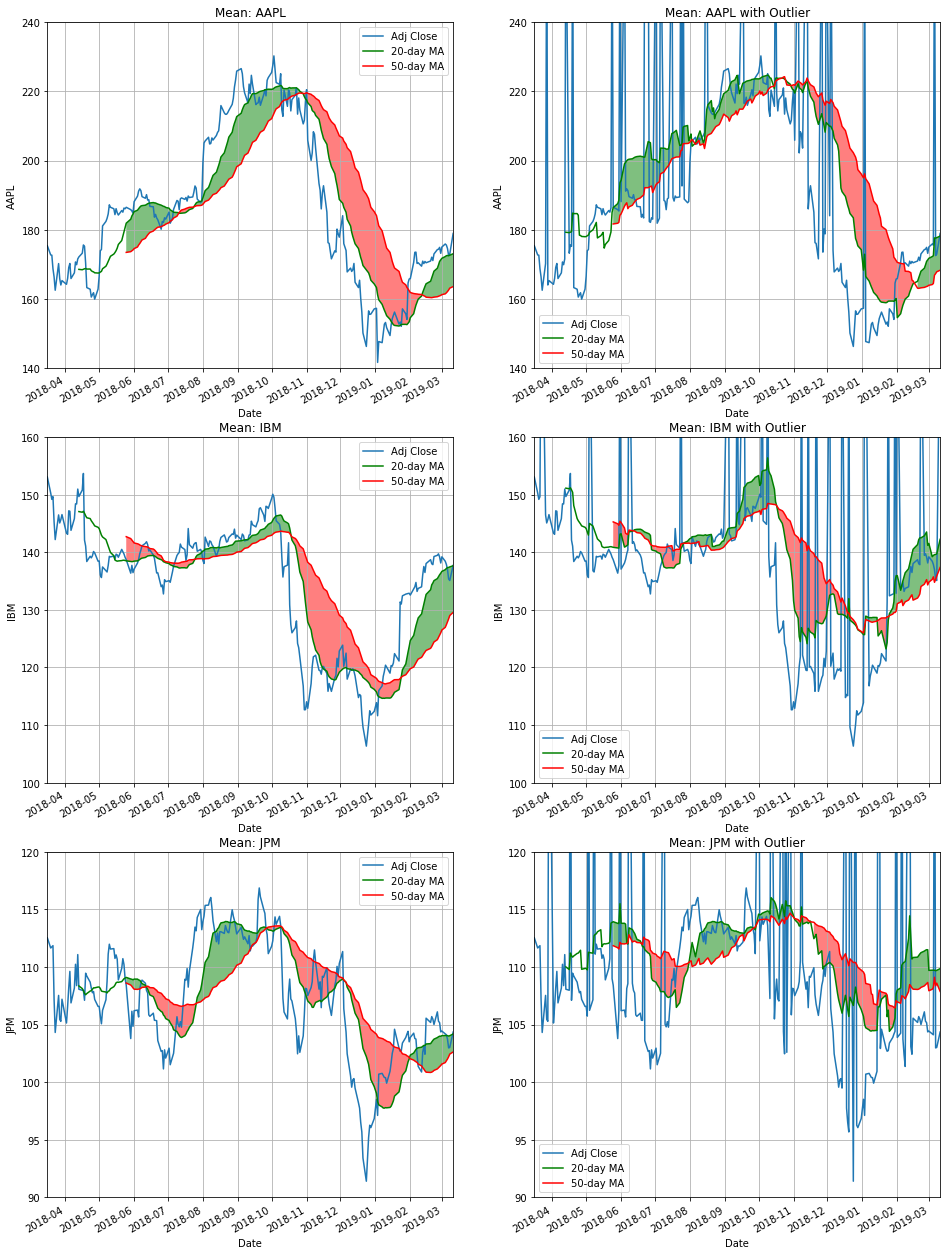

In [4]:
def plot_ma(df, ax, ylim, title='', ylabel = ''):
    df[['Adj Close']].plot(ax = ax)
    date = df.index
    y1 = df['20-day MA']
    y2 = df['50-day MA']
    y1.plot(color='g', label='20-day MA', ax = ax)
    y2.plot(color='r', label='50-day MA', ax = ax)
    ax.set_title(title)
    ax.set_ylim(ylim)
    ax.fill_between(date, y1, y2, where=y1 > y2, facecolor='g', alpha=0.5)
    ax.fill_between(date, y1, y2, where=y1 < y2, facecolor='r', alpha=0.5)
    ax.legend()
    ax.grid()
    ax.set_ylabel(ylabel)

    
fig = plt.figure(figsize=(16,24))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)    
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)   

plot_ma(df_aapl, ax = ax1, ylim = (140,240), title = "Mean: AAPL", ylabel = "AAPL")    
plot_ma(df_ibm, ax = ax3, ylim = (100,160), title = "Mean: IBM", ylabel = "IBM")   
plot_ma(df_jpm, ax = ax5, ylim = (90,120), title = "Mean: JPM", ylabel = "JPM")   
plot_ma(outlier_aapl, ax = ax2, ylim = (140,240), title = "Mean: AAPL with Outlier", ylabel = "AAPL")    
plot_ma(outlier_ibm, ax = ax4, ylim = (100,160), title = "Mean: IBM with Outlier", ylabel = "IBM")   
plot_ma(outlier_jpm, ax = ax6, ylim = (90,120), title = "Mean: JPM with Outlier", ylabel = "JPM")   

plt.savefig("images//ma_cross")

In [5]:
def moving_median(df):
    temp_df = df.copy()
    ma20 = temp_df[['Adj Close']].rolling(20).median()
    ma20.columns = ['20-day Median']
    ma50 = temp_df[['Adj Close']].rolling(50).median()
    ma50.columns = ['50-day Median']
    return pd.concat([df, ma20, ma50], axis=1)

df_aapl = moving_median(df_aapl)
df_ibm = moving_median(df_ibm)
df_jpm = moving_median(df_jpm)

outlier_aapl = moving_median(outlier_aapl)
outlier_ibm = moving_median(outlier_ibm)
outlier_jpm = moving_median(outlier_jpm)

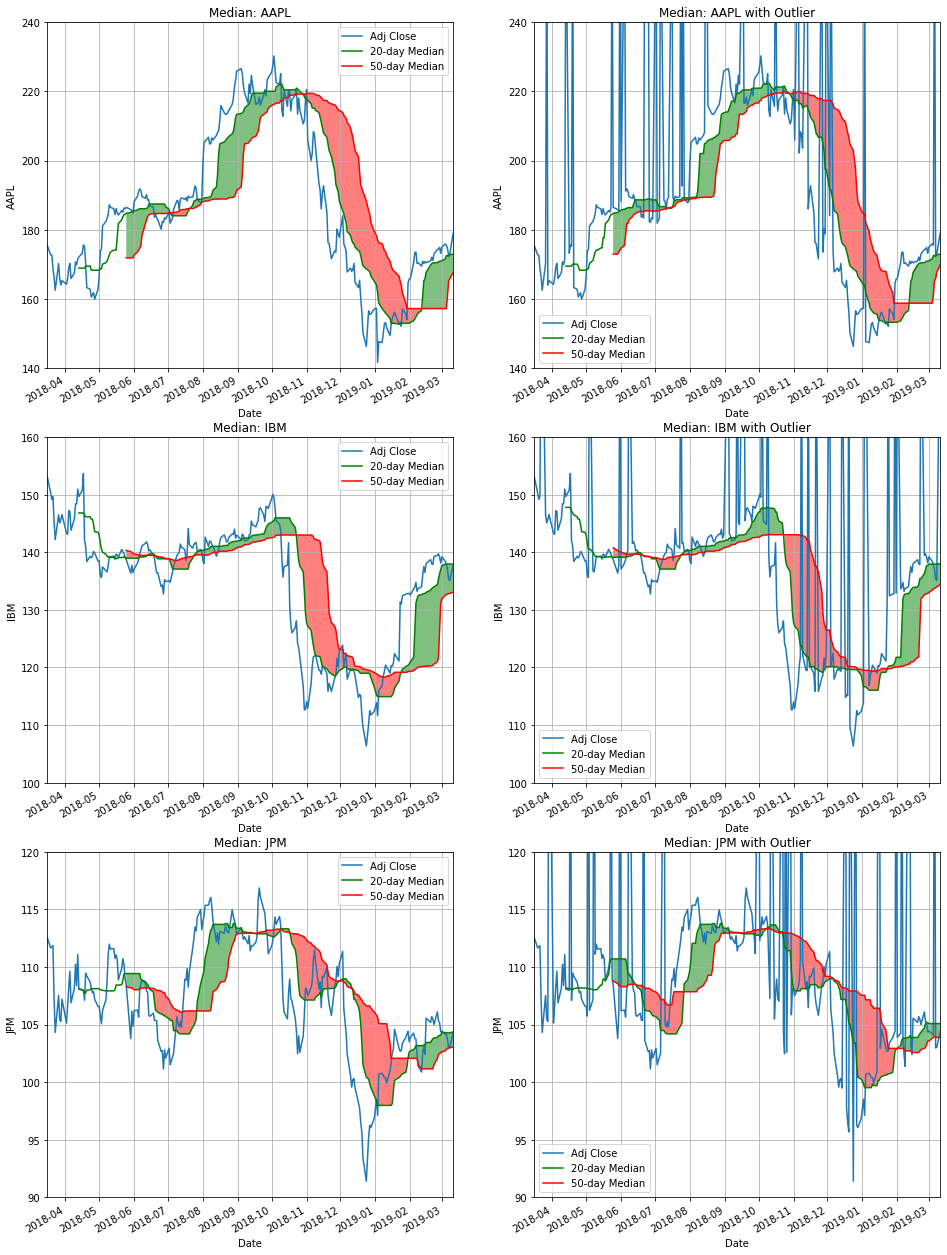

In [6]:
def plot_median(df, ax, ylim, title='', ylabel = ''):
    df[['Adj Close']].plot(ax = ax)
    date = df.index
    y1 = df['20-day Median']
    y2 = df['50-day Median']
    y1.plot(color='g', label='20-day Median', ax = ax)
    y2.plot(color='r', label='50-day Median', ax = ax)
    ax.set_title(title)
    ax.set_ylim(ylim)
    ax.fill_between(date, y1, y2, where=y1 > y2, facecolor='g', alpha=0.5)
    ax.fill_between(date, y1, y2, where=y1 < y2, facecolor='r', alpha=0.5)
    ax.legend()
    ax.grid()
    ax.set_ylabel(ylabel)

    
fig = plt.figure(figsize=(16,24))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)    
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)   

plot_median(df_aapl, ax = ax1, ylim = (140,240), title = "Median: AAPL", ylabel = "AAPL")    
plot_median(df_ibm, ax = ax3, ylim = (100,160), title = "Median: IBM", ylabel = "IBM")   
plot_median(df_jpm, ax = ax5, ylim = (90,120), title = "Median: JPM", ylabel = "JPM")   
plot_median(outlier_aapl, ax = ax2, ylim = (140,240), title = "Median: AAPL with Outlier", ylabel = "AAPL")    
plot_median(outlier_ibm, ax = ax4, ylim = (100,160), title = "Median: IBM with Outlier", ylabel = "IBM")   
plot_median(outlier_jpm, ax = ax6, ylim = (90,120), title = "Median: JPM with Outlier", ylabel = "JPM")   

plt.savefig("images//median_cross")